In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon
import geopandas as gpd

<AxesSubplot:xlabel='x_coord', ylabel='y_coord'>

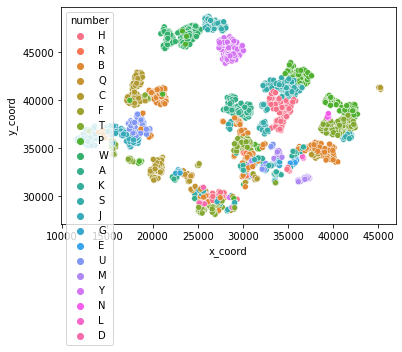

In [11]:
data = pd.read_csv('results/2021-01-01.csv')
g = data.groupby('time')
g = g.get_group((list(g.groups)[0]))
hdb = pd.read_csv('C:/Users/User/Documents/carpark datasets/hdb-carpark-information.csv')
df = pd.merge(g,hdb,left_on='number',right_on='car_park_no')
df['number'] = df['number'].str[0] 
sns.scatterplot(x="x_coord", y="y_coord",
              hue="number",
              data=df)

In [2]:
import pandas as pd
import numpy as np
housing_num=pd.read_csv('Housing_Location.csv')
housing_num.drop(housing_num.columns[-1],axis=1,inplace=True)
housing_num.columns = housing_num.columns.str[1:-1]
housing_df=housing_num.select_dtypes('object')
housing_num[housing_df.columns]=housing_df.apply(lambda x: x.str.strip())
housing_num.drop(housing_num.columns[1:23],axis=1,inplace=True)
housing_num = housing_num.loc[1:26]
housing_num['2018']=housing_num['2018'].str.split(',').str.get(0)+housing_num['2018'].str.split(',').str.get(1)
housing_num['2019']=housing_num['2019'].str.split(',').str.get(0)+housing_num['2019'].str.split(',').str.get(1)
housing_num['2020']=housing_num['2020'].str.split(',').str.get(0)+housing_num['2020'].str.split(',').str.get(1)
housing_num = housing_num.astype({'2018': np.int})
housing_num = housing_num.astype({'2019': np.int})
housing_num = housing_num.astype({'2020': np.int})
housing_num

<ipython-input-2-b0af0d2a8d75>:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  housing_num = housing_num.astype({'2018': np.int})
<ipython-input-2-b0af0d2a8d75>:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in N

,Variables,2018,2019,2020
1,Ang Mo Kio,50728,50726,51312
2,Bedok,62156,62513,63031
3,Bishan,20072,20072,20072
4,Bukit Batok,42988,43623,45092
5,Bukit Merah,55110,54269,54227
6,Bukit Panjang,35325,35325,35325
7,Bukit Timah,2554,2554,2554
8,Central Area,12004,12003,12003
9,Choa Chu Kang,48900,48900,49026
10,Clementi,26601,26345,26730


In [3]:
import geopandas as gpd
regions = gpd.read_file('regions.geojson')
ind = regions.Description.str.find('PLN_AREA_C')
for i in range(0,332):
    regions.Description.loc[i] = regions.Description[i][ind[i]+20:ind[i]+22]
regions.rename(columns={'Description':'Area'},inplace=True)

C:\Users\User\anaconda3\envs\virtualisation\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [4]:
data = pd.read_csv('C:/Users/User/Documents/carpark datasets/output_2019/2019-01-01.csv')
g = data.groupby('time')
g = g.get_group((list(g.groups)[0]))
hdb = pd.read_csv('C:/Users/User/Documents/carpark datasets/hdb-carpark-information.csv')
df = pd.merge(g,hdb,left_on='number',right_on='car_park_no')


geometric_points = []
for xy in zip(df['x_coord'], df['y_coord']):
   geometric_points.append(Point(xy))
gl = gpd.GeoDataFrame(df, crs = {'init': 'epsg:3414'}, geometry = geometric_points)
gl = gl.to_crs(4326)
gl=pd.DataFrame(gl)

r = []

for i in range(0, len(gl)):
   point = gl.geometry.loc[i]
   r.append(regions[regions.contains(point).values]['Area'].iloc[0])

gl['region']=r
gl.drop(df.columns[range(2,17)],axis=1,inplace=True)
gl.drop(df.columns[0],axis=1,inplace=True)

C:\Users\User\anaconda3\envs\virtualisation\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [6]:
gl

,number,geometry,region
0,HE12,POINT (103.81865 1.28821),BM
1,HLM,POINT (103.84549 1.28476),OT
2,RHM,POINT (103.81858 1.28646),BM
3,BM29,POINT (103.81710 1.28363),BM
4,Q81,POINT (103.79316 1.30754),QT
...,...,...,...
1882,PL78,POINT (103.89750 1.41122),PG
1883,PL77,POINT (103.91955 1.40101),PG
1884,TJ41,POINT (103.72340 1.32681),JW
1885,J49M,POINT (103.71968 1.35378),JW


In [5]:
def classify(row):
    if row.region=='BM':return 'Bukit Merah'
    elif row.region=='OT':return 'gay'
    elif row.region=='QT':return 'Queenstown'
    elif row.region=='CL':return 'Clementi'
    elif row.region=='BT':return 'Bukit Timah'
    elif row.region=='JE':return 'Jurong East'
    elif row.region=='JW':return 'Jurong West'
    elif row.region=='HG':return 'Hougang'
    elif row.region=='PR':return 'Pasir Ris'
    elif row.region=='TM':return 'Tampines'
    elif row.region=='BD':return 'Bedok'
    elif row.region=='RC':return 'gay'
    elif row.region=='AM':return 'Ang Mo Kio'
    elif row.region=='BS':return 'Bishan'
    elif row.region=='SG':return 'Serangoon'
    elif row.region=='KL':return 'Kallang/Whampoa'
    elif row.region=='BK':return 'Bukit Batok'
    elif row.region=='NV':return 'gay'
    elif row.region=='GL':return 'Geylang'
    elif row.region=='MP':return 'Marine Parade'
    elif row.region=='TP':return 'Toa Payoh'
    elif row.region=='YS':return 'Yishun'
    elif row.region=='BP':return 'Bukit Panjang'
    elif row.region=='WD':return 'Woodlands'
    elif row.region=='PG':return 'Punggol'
    elif row.region=='CK':return 'Choa Chu Kang'
    elif row.region=='TN':return 'gay'
    elif row.region=='SE':return 'Sengkang'
    elif row.region=='SB':return 'Sembawang'
    elif row.region=='CH':return 'gay'
    elif row.region=='DT':return 'gay'

gl['area']=gl.apply(classify,axis='columns')

In [6]:
gl

,number,geometry,region,area
0,HE12,POINT (103.81865 1.28821),BM,Bukit Merah
1,HLM,POINT (103.84549 1.28476),OT,gay
2,RHM,POINT (103.81858 1.28646),BM,Bukit Merah
3,BM29,POINT (103.81710 1.28363),BM,Bukit Merah
4,Q81,POINT (103.79316 1.30754),QT,Queenstown
...,...,...,...,...
1882,PL78,POINT (103.89750 1.41122),PG,Punggol
1883,PL77,POINT (103.91955 1.40101),PG,Punggol
1884,TJ41,POINT (103.72340 1.32681),JW,Jurong West
1885,J49M,POINT (103.71968 1.35378),JW,Jurong West


In [8]:
num_df=gl.merge(housing_num.iloc[0:27],left_on='area',right_on='Variables',how='left')
num_df = num_df[num_df.area!='gay']
num_df

,number,geometry,region,area,Variables,2018,2019,2020
0,HE12,POINT (103.81865 1.28821),BM,Bukit Merah,Bukit Merah,55110.0,54269.0,54227.0
2,RHM,POINT (103.81858 1.28646),BM,Bukit Merah,Bukit Merah,55110.0,54269.0,54227.0
3,BM29,POINT (103.81710 1.28363),BM,Bukit Merah,Bukit Merah,55110.0,54269.0,54227.0
4,Q81,POINT (103.79316 1.30754),QT,Queenstown,Queenstown,32676.0,33164.0,33973.0
5,C20,POINT (103.76526 1.31335),CL,Clementi,Clementi,26601.0,26345.0,26730.0
...,...,...,...,...,...,...,...,...
1882,PL78,POINT (103.89750 1.41122),PG,Punggol,Punggol,49909.0,49909.0,51704.0
1883,PL77,POINT (103.91955 1.40101),PG,Punggol,Punggol,49909.0,49909.0,51704.0
1884,TJ41,POINT (103.72340 1.32681),JW,Jurong West,Jurong West,75208.0,75208.0,75207.0
1885,J49M,POINT (103.71968 1.35378),JW,Jurong West,Jurong West,75208.0,75208.0,75207.0


In [49]:
import pandas as pd
import os


dir = 'C:/Users/User/Documents/carpark datasets/output_2019/' ## take processed data
output = f'{dir}/../transform/'
if not os.path.isdir(output):
    os.mkdir(output)

df = None

for f_name in os.listdir(dir):
    df_tmp = pd.read_csv(dir+f_name)
    # DRop unamed column and 0 lots value
    df_tmp = df_tmp.loc[:, ~df_tmp.columns.str.contains('^Unnamed')]
    df_tmp = df_tmp.loc[~(df_tmp['total'] == 0)]
    date=df_tmp.time.str.split(' ').str.get(0).unique()[0]
    print (date)
    df_tmp = df_tmp.groupby(['number'], as_index=False).mean().astype({'total': 'int16', 'available': 'int16'}).sort_values('total', ascending=True)
    # print(df_tmp.dtypes)
    df_tmp['avail_percent'] = round((df_tmp['available']/df_tmp['total']), 3)
    # drop row with available > total and carpark with > 4443 lots
    df_tmp = df_tmp.loc[~(df_tmp['avail_percent'] > 1) & ~(df_tmp['total'] > 4443)]
    # add a column of date
    df_tmp['date'] = date
    # reset and drop index
    df_tmp.reset_index(drop=True, inplace=True)
    #df = df_tmp if df is None else pd.concat([df,df_tmp]) #this is for extracting data from multiples files and concatenating them
    df_tmp.to_csv(f'{output+date}-trans_m_pd_pc.csv', index = False) 


2019-01-01
2019-01-02
2019-01-03
2019-01-04
2019-01-05
2019-01-06
2019-01-07
2019-01-08
2019-01-09
2019-01-10
2019-01-11
2019-01-12
2019-01-13
2019-01-14
2019-01-15
2019-01-16
2019-01-17
2019-01-18
2019-01-19
2019-01-20
2019-01-21
2019-01-22
2019-01-23
2019-01-24
2019-01-25
2019-01-26
2019-01-27
2019-01-28
2019-01-29
2019-01-30
2019-01-31
2019-02-01
2019-02-02
2019-02-03
2019-02-04
2019-02-05
2019-02-06
2019-02-07
2019-02-08
2019-02-09
2019-02-10
2019-02-11
2019-02-12
2019-02-13
2019-02-14
2019-02-15
2019-02-16
2019-02-17
2019-02-18
2019-02-19
2019-02-20
2019-02-21
2019-02-22
2019-02-23
2019-02-24
2019-02-25
2019-02-26
2019-02-27
2019-02-28
2019-03-01
2019-03-02
2019-03-03
2019-03-04
2019-03-05
2019-03-06
2019-03-07
2019-03-08
2019-03-09
2019-03-10
2019-03-11
2019-03-12
2019-03-13
2019-03-14
2019-03-15
2019-03-16
2019-03-17
2019-03-18
2019-03-19
2019-03-20
2019-03-21
2019-03-22
2019-03-23
2019-03-24
2019-03-25
2019-03-26
2019-03-27
2019-03-28
2019-03-29
2019-03-30
2019-03-31
2019-04-01

In [15]:
import glob, os
import pandas as pd

dir = f'C:/Users/User/Documents/carpark datasets/transform_2019/' ## take output files from calmeanday.py
output = f'{dir}/../transform/'
if not os.path.isdir(output):
    os.mkdir(output)

all_files = os.listdir(dir)
df = pd.concat((pd.read_csv(dir+f) for f in all_files))
df = df.reset_index()
df

,index,number,total,available,avail_percent,date
0,0,S24L,2,1,0.500,2019-01-01
1,1,JCML,2,0,0.000,2019-01-01
2,2,GEML,3,1,0.333,2019-01-01
3,3,LUB,3,0,0.000,2019-01-01
4,4,P5L,4,1,0.250,2019-01-01
...,...,...,...,...,...,...
674568,1887,BJ48,1995,847,0.425,2019-12-31
674569,1888,CK52,2064,1221,0.592,2019-12-31
674570,1889,CK58,2637,1735,0.658,2019-12-31
674571,1890,CKM5,2754,2071,0.752,2019-12-31


In [49]:
a = num_df.merge(df.groupby('number').agg({'total':'sum','available':'sum','avail_percent':np.average}),on='number',how='left')
a.avail_percent=a.avail_percent*100
a

,number,geometry,region,area,Variables,2018,2019,2020,total,available,avail_percent
0,HE12,POINT (103.81865 1.28821),BM,Bukit Merah,Bukit Merah,55110.0,54269.0,54227.0,31131,5508,17.549041
1,RHM,POINT (103.81858 1.28646),BM,Bukit Merah,Bukit Merah,55110.0,54269.0,54227.0,117530,68840,58.569863
2,BM29,POINT (103.81710 1.28363),BM,Bukit Merah,Bukit Merah,55110.0,54269.0,54227.0,35404,17314,48.909315
3,Q81,POINT (103.79316 1.30754),QT,Queenstown,Queenstown,32676.0,33164.0,33973.0,35040,14974,42.733151
4,C20,POINT (103.76526 1.31335),CL,Clementi,Clementi,26601.0,26345.0,26730.0,63144,19695,31.187397
...,...,...,...,...,...,...,...,...,...,...,...
1826,PL78,POINT (103.89750 1.41122),PG,Punggol,Punggol,49909.0,49909.0,51704.0,176342,124064,70.351233
1827,PL77,POINT (103.91955 1.40101),PG,Punggol,Punggol,49909.0,49909.0,51704.0,133617,80570,59.861370
1828,TJ41,POINT (103.72340 1.32681),JW,Jurong West,Jurong West,75208.0,75208.0,75207.0,111093,84100,75.812877
1829,J49M,POINT (103.71968 1.35378),JW,Jurong West,Jurong West,75208.0,75208.0,75207.0,144948,115158,79.459452


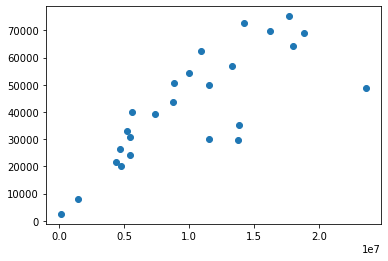

In [40]:
plt.scatter(a.groupby('region').total.sum(),a.groupby('region')['2019'].mean())

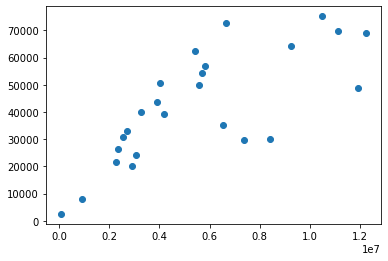

In [53]:
plt.scatter(a.groupby('region').available.sum(),a.groupby('region')['2019'].mean())

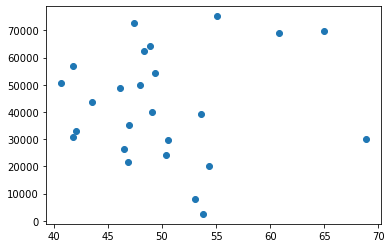

In [52]:
plt.scatter(a.groupby('region').avail_percent.mean(),a.groupby('region')['2019'].mean())